# Exploratory Analysis of Austin 3-1-1 Calls
---
<img src="imgs/exploratory_analysis.jpg" alt="Dashboard of Data Studio" width=600 height=600/>

In [1]:
# !mkdir -p clean_data
# !rm -rf clean_data/'complete_austin_311.csv'
# !wget 'https://austin-311-data.s3.us-east-2.amazonaws.com/complete_austin_311.csv' -P clean_data

In [2]:
%matplotlib inline 
import numpy as np # linear algebra lib
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.stats as stats # Stats API 
import matplotlib.pyplot as plt # Plotting API
import seaborn as sns # Wrapper for Matplotlib 
import plotly.graph_objs as go # for interactive plotting
import plotly_express as px # Wrapper for plotly https://plot.ly/python/plotly-express/#visualize-distributions
import warnings # Necessary to ignore warnings
warnings.filterwarnings('ignore')
# Removes rows and columns truncation of '...'
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
austin_311 = pd.read_csv('clean_data/complete_austin_311.csv', low_memory=False, parse_dates=['Incident Date'],infer_datetime_format=True)
austin_311.head()

,Incident Type Code,Incident Description,Owning Department,Method Received,Incident Date,Zip Code,Latitude Coordinate,Longitude Coordinate,Incident Year,Incident Month,Incident Hour,Incident Weekday,Total population,Total household,Median household income
0,TRASIGMA,Traffic Signal - Maintenance,Transportation,Phone,2016-05-06 12:01:46,78703,30.296699,-97.768264,2016,5,12,Friday,20788.0,9723.0,98553.0
1,TRASIGMA,Traffic Signal - Maintenance,Transportation,Phone,2016-05-06 19:51:27,78745,30.212695,-97.801521,2016,5,19,Friday,62220.0,25857.0,60567.0
2,TRASIGMA,Traffic Signal - Maintenance,Transportation,Phone,2016-05-06 20:22:56,78745,30.212695,-97.801521,2016,5,20,Friday,62220.0,25857.0,60567.0
3,SWSDEADA,ARR Dead Animal Collection,Austin Resource Recovery,Phone,2016-12-15 06:41:40,78741,30.230164,-97.731776,2016,12,6,Thursday,52307.0,20758.0,39049.0
4,TRASIGMA,Traffic Signal - Maintenance,Transportation,Phone,2016-05-06 17:03:45,78759,30.384989,-97.766471,2016,5,17,Friday,41847.0,20240.0,76749.0


In [4]:
austin_311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714494 entries, 0 to 714493
Data columns (total 15 columns):
Incident Type Code         714494 non-null object
Incident Description       714494 non-null object
Owning Department          714494 non-null object
Method Received            714494 non-null object
Incident Date              714494 non-null datetime64[ns]
Zip Code                   714494 non-null int64
Latitude Coordinate        714494 non-null float64
Longitude Coordinate       714494 non-null float64
Incident Year              714494 non-null int64
Incident Month             714494 non-null int64
Incident Hour              714494 non-null int64
Incident Weekday           714494 non-null object
Total population           714494 non-null float64
Total household            714494 non-null float64
Median household income    714494 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(4), object(5)
memory usage: 81.8+ MB


## Let's dig in, starting with Top 10s


<img src="https://media.giphy.com/media/zoe6vq4UiWNJ6/giphy.gif" alt="Gif image" align="center"/>

> NOTE: Before we start let's make sure plots are colorblind friendly

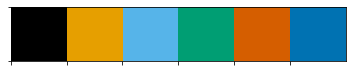

In [5]:
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]
sns.palplot(sns.color_palette(colors));

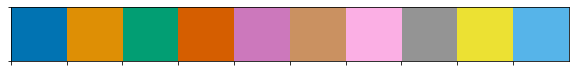

In [6]:
sns.palplot(sns.color_palette("colorblind"))

### Ten Most Commonly Occurring Complaints

In [7]:
complaint_counts = austin_311['Incident Description'].value_counts().sort_values(ascending=False)
top_10_complaints = complaint_counts[:10]
top_10_complaints

Austin Code - Request Code Officer     131423
Traffic Signal - Maintenance            47713
Loose Dog                               44642
ARR Missed Recycling                    32733
ARR Dead Animal Collection              30958
Animal Control - Assistance Request     30310
Street Light Issue- Address             28054
Injured / Sick Animal                   22354
Pothole Repair                          16455
Water Waste Report                      14753
Name: Incident Description, dtype: int64

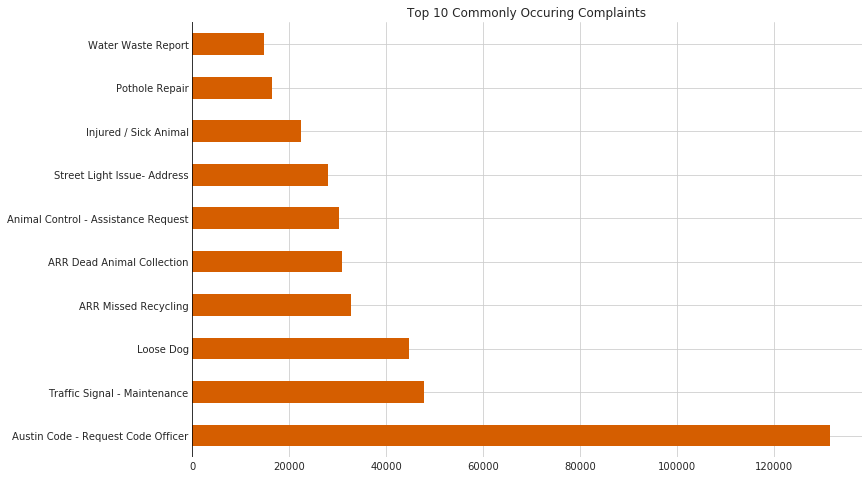

In [8]:
plt.style.use('seaborn-whitegrid')

# Create figure
fig = plt.figure(figsize=(12, 8))

# PLot horizontal bar plot
ax = top_10_complaints.plot.barh(x='Top 10 Complaints', y='Complaint Count', title='Top 10 Commonly Occuring Complaints', color=sns.color_palette("colorblind")[3])

# set inner Axes color
ax.set(facecolor='white')

# Empahsizes y-axis
ax.axvline(0, color="k")

# Remove all of the axis tick marks
ax.tick_params(bottom=True, top=False, left=False, right=False)

# Hide all of the spines
for spine in ax.spines.values():
    spine.set_visible(False)

## Top Ten Most Busy Departments

In [9]:
departments = austin_311['Owning Department'].value_counts().sort_values(ascending=False)
top_10_departments = departments[:10]
top_10_departments

Animal Services Office             142541
Austin Code Department             140489
Transportation                     131936
Austin Resource Recovery           101682
Public Works                        73982
Austin Energy Department            29605
Parks & Recreation Department       23707
Economic Development Department     16320
Watershed Protection                13983
Health & Human Services             13092
Name: Owning Department, dtype: int64

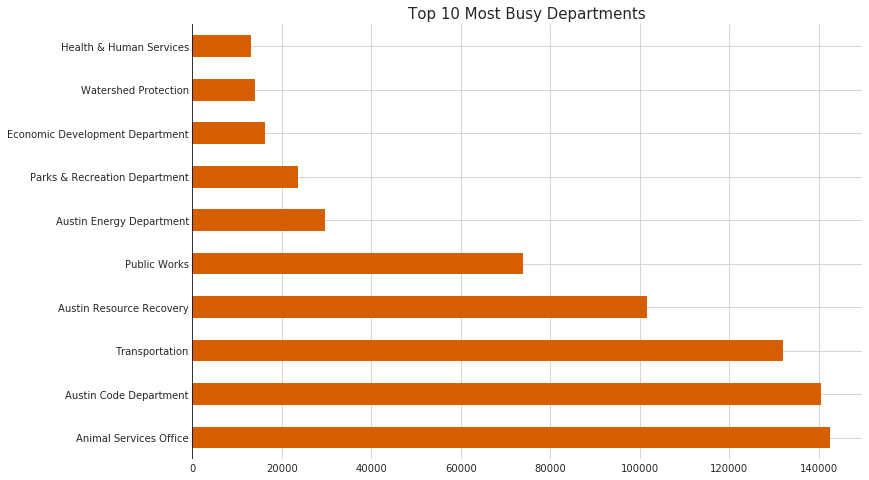

In [10]:
plt.style.use('seaborn-whitegrid')

# Create figure
fig = plt.figure(figsize=(12, 8))

# PLot horizontal bar plot
ax = top_10_departments.plot.barh(color=sns.color_palette("colorblind")[3])

# Add plot title
ax.set_title('Top 10 Most Busy Departments', fontsize=15)

# set inner Axes color
ax.set(facecolor='white')

# Empahsizes y-axis
ax.axvline(0, color="k")

# Remove all of the axis tick marks
ax.tick_params(bottom=True, top=False, left=False, right=False)

# Hide all of the spines
for spine in ax.spines.values():
    spine.set_visible(False)

## Top Ten Most Common Source of 311 calls

In [11]:
common_source = austin_311['Method Received'].value_counts().sort_values(ascending=False)
top_10_common_source = common_source[:10]

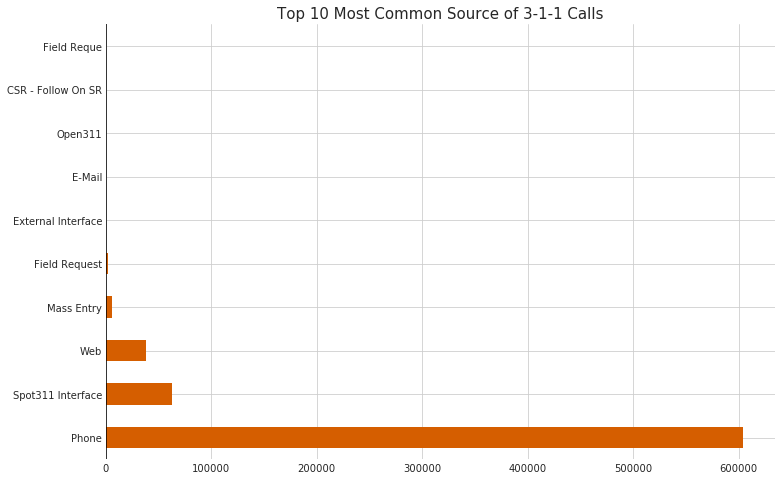

In [12]:
plt.style.use('seaborn-whitegrid')

# Create figure
fig = plt.figure(figsize=(12, 8))

# PLot horizontal bar plot
ax = top_10_common_source.plot.barh(color=sns.color_palette("colorblind")[3])

# Add plot title
ax.set_title('Top 10 Most Common Source of 3-1-1 Calls', fontsize=15) 

# Set inner Axes color
ax.set(facecolor='white')

# Empahsizes y-axis
ax.axvline(0, color="k")

# Remove all of the axis tick marks
ax.tick_params(bottom=True, top=False, left=False, right=False)

# Hide all of the spines
for spine in ax.spines.values():
    spine.set_visible(False)
    

# Time series analysis

In [13]:
# Subset data frame to appropriate datetime info. columns
dt_austin311 = austin_311[['Incident Type Code', 'Incident Year', 'Incident Month', 'Incident Hour', 'Incident Weekday']].rename(columns={"Incident Type Code": "Number of Complaints"})
dt_austin311.head()

,Number of Complaints,Incident Year,Incident Month,Incident Hour,Incident Weekday
0,TRASIGMA,2016,5,12,Friday
1,TRASIGMA,2016,5,19,Friday
2,TRASIGMA,2016,5,20,Friday
3,SWSDEADA,2016,12,6,Thursday
4,TRASIGMA,2016,5,17,Friday


In [14]:
# Make Pivot table of complaint counts
pivot_austin311 = dt_austin311.pivot_table(values='Number of Complaints', index=['Incident Year', 'Incident Month'], aggfunc='count')
pivot_austin311

Number of Complaints
Incident Year Incident Month                      
2013          12                                20
2014          1                               8328
              2                               7652
              3                               9498
              4                              10965
              5                              10391
              6                              12182
              7                              11895
              8                              11926
              9                              12020
              10                             11298
              11                              8667
              12                              8635
2015          1                               8636
              2                               7898
              3                              10192
              4                              11298
              5                              13780
              6                              14865
              7                              13425
              8                              12144
              9                              11043
              10                             11832
              11                              9505
              12                              8210
2016          1                               8594
              2                               8494
              3                              10077
              4                              11166
              5                              12376
              6                              12626
              7                               9522
              8                              11640
              9                              12231
              10                             10311
              11                              8859
              12                              8158
2017          1                               4466
              2                               2054
              3                               8763
              4                               7435
              5                              10889
              6                              11121
              7                              10468
              8                              11828
              9                              10303
              10                              9555
              11                              5736
              12                              7694
2018          1                               8737
              2                               8299
              3                               9976
              4                              10943
              5                              12693
              6                              11844
              7                              12036
              8                              12655
              9                              13203
              10                             14774
              11                             10730
              12                              8304
2019          1                              11764
              2                              11353
              3                              13273
              4                              15748
              5                              17921
              6                              16004
              7                              13566

**Since the year `2013` has only single month, we can drop that, and keep data from `2014-2019`.**

In [15]:
dt_austin311 = dt_austin311[dt_austin311['Incident Year'] != 2013]
dt_austin311['Incident Year'].unique()

array([2016, 2015, 2014, 2017, 2019, 2018])

## By Year

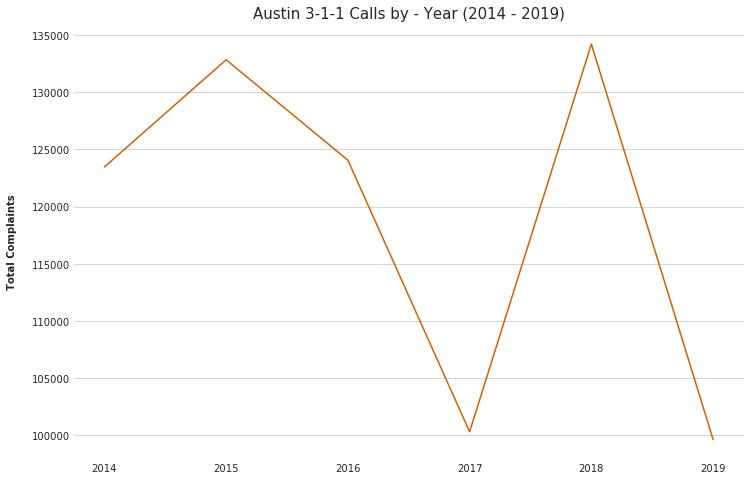

In [16]:
counts_by_year = dt_austin311['Incident Year'].value_counts().sort_index()

# Set style
plt.style.use('seaborn-whitegrid')

# Create figure
fig = plt.figure(figsize=(12, 8))

# Create line plot
ax = counts_by_year.plot(color=sns.color_palette("colorblind")[3], linewidth=1.5)

# Add plot title
ax.set_title('Austin 3-1-1 Calls by - Year (2014 - 2019)', fontsize=15)

# Add title to x and y axis
ax.set_ylabel('Total Complaints', fontweight='bold', labelpad=15)

# Turn off y axis grid
ax.grid(axis='x')

# Hide all of the spines
for spine in ax.spines.values():
    spine.set_visible(False)


This is interesting, total complaints dropped in `2017` after it peaked in `2015`, than sudden rise in complaints in `2018`, while `2019` still isn't quite close to `2018` yet.

A divering plot would also help here, let's plot it, 

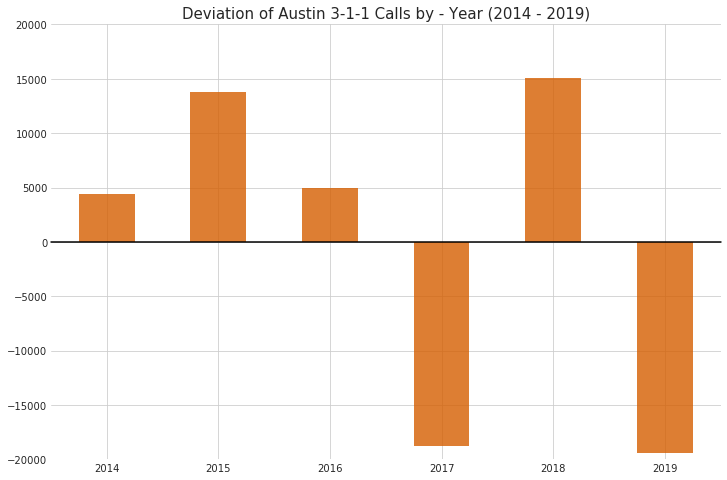

In [17]:
diff = counts_by_year - counts_by_year.mean()

plt.style.use('seaborn-whitegrid')

# Create figure
fig = plt.figure(figsize=(12, 8))

# PLot horizontal bar plot
ax = diff.plot(kind='bar', color=sns.color_palette("colorblind")[3], alpha=0.8)

# Add plot title
ax.set_title('Deviation of Austin 3-1-1 Calls by - Year (2014 - 2019)', fontsize=15) 

# Set inner Axes color
ax.set(facecolor='white')

# Fix y-axis limits
ax.set_ylim([-20000, 20000])

# Remove all of the axis tick marks
ax.tick_params(bottom=True, top=False, left=False, right=False)

# Set vertical and horizontal lines
ax.axhline(0, color="k", clip_on=False)

# Rotate x-ticklabels
xlabels = ax.get_xticklabels()
ax.set_xticklabels(labels=xlabels, rotation=0)

# Hide all of the spines
for spine in ax.spines.values():
    spine.set_visible(False)
    


Indeed, `2017` has been the lowest year with fewest call, while `2019` can be considered inconclusive as we don't have enough data yet. We can explore this further later on by looking at the plot by year and month.

## By Month

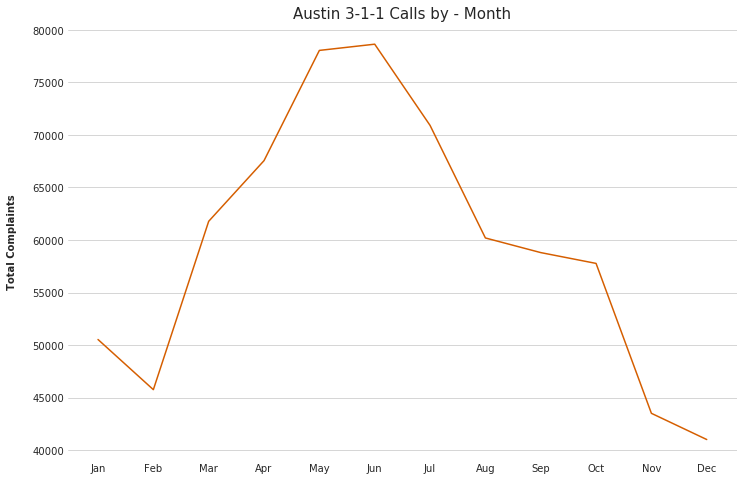

In [18]:
counts_by_month = dt_austin311['Incident Month'].value_counts().sort_index()

# Set style
plt.style.use('seaborn-whitegrid')

# Create figure
fig = plt.figure(figsize=(12, 8))

# Create line plot
ax = counts_by_month.plot(color=sns.color_palette("colorblind")[3], linewidth=1.5)

# Add plot title
ax.set_title('Austin 3-1-1 Calls by - Month', fontsize=15)

# Add title to x and y axis
ax.set_ylabel('Total Complaints', fontweight='bold', labelpad=15)

# Correct x-ticks
ax.set_xticks(range(1, 13))
ax.set_xticklabels(labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Turn off y axis grid
ax.grid(axis='x')

# Hide all of the spines
for spine in ax.spines.values():
    spine.set_visible(False)


It looks like Late Spring and Early Summer have the most 311 calls by far, compare to Winter months.

## By Year and Month

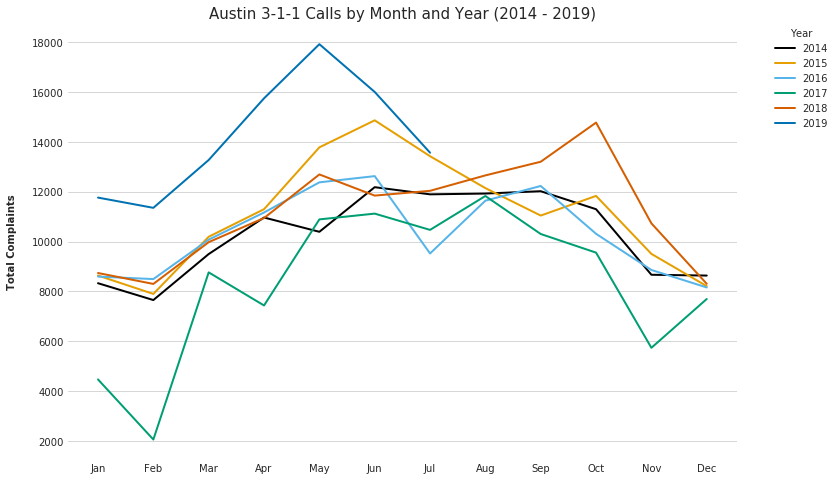

In [19]:
# Get pivot table
complnts_by_year_and_month = dt_austin311.pivot_table(values='Number of Complaints', index='Incident Month', columns='Incident Year', aggfunc='count')

# Set style
plt.style.use('seaborn-whitegrid')

# Create figure
fig = plt.figure(figsize=(12, 8))

# Get current axis
ax = plt.gca()

# Create line plot
ax = complnts_by_year_and_month.plot(kind='line', ax=ax, linewidth=2, color=colors)

# Add plot title
ax.set_title('Austin 3-1-1 Calls by Month and Year (2014 - 2019)', fontsize=15)

# Add y axis label and turn of x axis label
ax.xaxis.label.set_visible(False)
ax.set_ylabel('Total Complaints', fontweight='bold', labelpad=15)

# Set x-ticks and labels
ax.set_xticks(range(1, 13))
ax.set_xticklabels(labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.grid(axis='x')

# Set legend
ax.legend(bbox_to_anchor=(1.05, 1), loc= 2, borderaxespad = 0., title="Year")

# Hide all of the spines
for spine in ax.spines.values():
    spine.set_visible(False)

There are couple of things to note here, 311 Calls for Austin following loose trend, with peak in Late Spring and Early Summer regardless of the Year calls were made. Another thing to note is 2019 started off with most calls, and this could be attributed to multitude of factors, like awarness of 3-1-1, or sudden increase in population. 

## By Hour

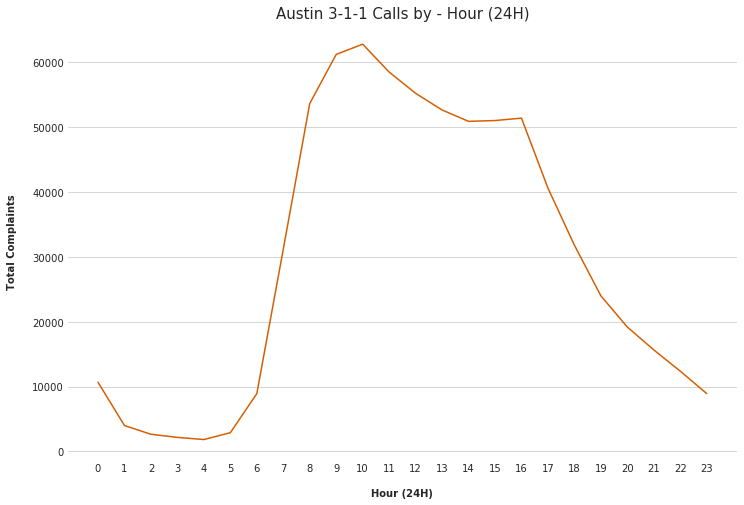

In [20]:
counts_by_hour = dt_austin311['Incident Hour'].value_counts().sort_index()

# Set style
plt.style.use('seaborn-whitegrid')

# Create figure
fig = plt.figure(figsize=(12, 8))

# Create line plot
ax = counts_by_hour.plot(color=sns.color_palette("colorblind")[3], linewidth=1.5)

# Add plot title
ax.set_title('Austin 3-1-1 Calls by - Hour (24H)', fontsize=15)

# Add title to x and y axis
ax.set_xlabel('Hour (24H)', fontweight='bold', labelpad=15)
ax.set_ylabel('Total Complaints', fontweight='bold', labelpad=15)

# Correct x-ticks
ax.set_xticks(range(0, 24))

ax.grid(axis='x')

# Hide all of the spines
for spine in ax.spines.values():
    spine.set_visible(False)


It looks like the busiest time is between 8-10 AM in morning, and 4 in the afternoon. 

## By Weekday

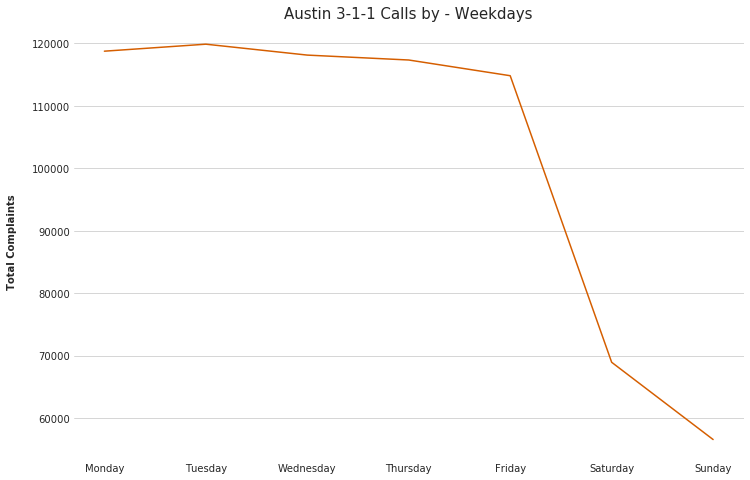

In [21]:
counts_by_wkdy = dt_austin311['Incident Weekday'].value_counts()
counts_by_wkday_vals = np.array([counts_by_wkdy['Monday'], counts_by_wkdy['Tuesday'], counts_by_wkdy['Wednesday'], counts_by_wkdy['Thursday'], counts_by_wkdy['Friday'], counts_by_wkdy['Saturday'], counts_by_wkdy['Sunday']])

# Set style
plt.style.use('seaborn-whitegrid')

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Create line plot
ax.plot(counts_by_wkday_vals, color=sns.color_palette("colorblind")[3], linewidth=1.5)

# Add plot title
ax.set_title('Austin 3-1-1 Calls by - Weekdays', fontsize=15)

# Add title to x and y axis
ax.set_ylabel('Total Complaints', fontweight='bold', labelpad=15)

# Correct x-ticks
ax.set_xticks(range(0, 7))
ax.set_xticklabels(labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.grid(axis='x')

# Hide all of the spines
for spine in ax.spines.values():
    spine.set_visible(False)


Looks like Weekdays were when the most complaints were reported, compared to Weekends. Another thing to note is, withing Weekdays, Monday and Tuesday were most complaints/service requests were made.

### By Hour and Weekday

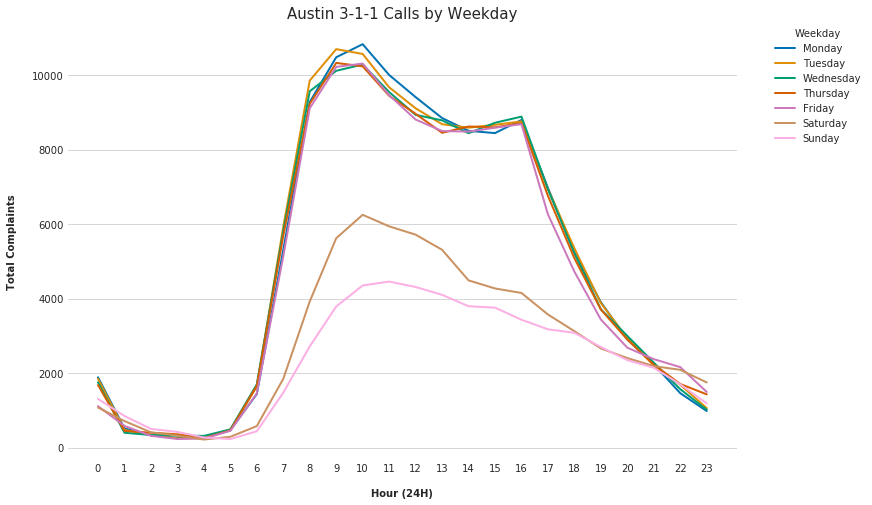

In [22]:
# Get pivot table of complaint counts by hour and weekday
counts_by_hour_wkdy = dt_austin311.pivot_table(values='Number of Complaints', index='Incident Hour', columns='Incident Weekday', aggfunc='count')

# Re-orient columns to proper weekday order so it's easy to see
counts_by_hour_wkdy = counts_by_hour_wkdy[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# Set style
plt.style.use('seaborn-whitegrid')

# Create figure
fig = plt.figure(figsize=(12, 8))

# Get current axis
ax = plt.gca()

# Create line plot
ax = counts_by_hour_wkdy.plot(kind='line', ax=ax, linewidth=2, color=sns.color_palette("colorblind"))

# Add plot title
ax.set_title('Austin 3-1-1 Calls by Weekday', fontsize=15)

# Add y axis label and turn of x axis label
ax.set_ylabel('Total Complaints', fontweight='bold', labelpad=15)
ax.set_xlabel('Hour (24H)', fontweight='bold', labelpad=15)

# Set x-ticks and labels
ax.set_xticks(range(0, 24))
ax.grid(axis='x')

# Set legend
ax.legend(bbox_to_anchor=(1.05, 1), loc= 2, borderaxespad = 0., title="Weekday")

# Hide all of the spines
for spine in ax.spines.values():
    spine.set_visible(False)




As we noticed earlier, no significant trend besides early morning service requests and around afternoon time (about 4 PM). 

In [23]:
comps_ovr_yrs = austin_311.loc[austin_311['Incident Description'].isin(top_10_complaints.index.tolist()), ['Incident Type Code', 'Incident Description', 'Incident Year']]
top_comps_ovr_yrs = comps_ovr_yrs.pivot_table(values='Incident Type Code', index='Incident Description', columns='Incident Year', aggfunc='count')
top_comps_ovr_yrs

Incident Year,2014,2015,2016,2017,2018,2019
Incident Description,,,,,,
ARR Dead Animal Collection,5342,6108,5417,4875,5503,3713
ARR Missed Recycling,5419,5937,6564,4551,6394,3868
Animal Control - Assistance Request,5974,5905,5332,3938,5202,3959
Austin Code - Request Code Officer,19603,22363,22641,18432,29057,19327
Injured / Sick Animal,3962,4179,4168,3088,3622,3335
Loose Dog,9429,8813,8230,5658,7621,4891
Pothole Repair,1384,3625,2850,2423,3172,3001
Street Light Issue- Address,4383,5090,5545,4446,5199,3391
Traffic Signal - Maintenance,8638,7672,7278,6314,9624,8187


In [24]:
comps_ovr_yrs.head()

,Incident Type Code,Incident Description,Incident Year
0,TRASIGMA,Traffic Signal - Maintenance,2016
1,TRASIGMA,Traffic Signal - Maintenance,2016
2,TRASIGMA,Traffic Signal - Maintenance,2016
3,SWSDEADA,ARR Dead Animal Collection,2016
4,TRASIGMA,Traffic Signal - Maintenance,2016
